In [1]:
# data_link https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [251]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from scipy import stats 
import matplotlib.style as style 
import seaborn as sns


In [321]:
train = pd.read_csv('train.csv') 
test = pd.read_csv('test.csv') 
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [322]:
all_data = pd.concat((train, test)).reset_index(drop = True) 
# drop  the target variable
all_data.drop(['SalePrice'], axis = 1, inplace = True)
# all_data[]
all_data 



Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
2914  2915         160       RM         21.0     1936   Pave   NaN      Reg   
2915  2916         160       RM         21.0     1894   Pave   NaN      Reg   
2916  2917          20       RL        160.0    20000   Pave   NaN      Reg   
2917  2918          85       RL         62.0    10441   Pave   NaN      Reg   
2918  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
2914         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
2915         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
2916         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
2917         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
2918         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
2914       Norm    Twnhs     2Story            4            7       1970   
2915       Norm   TwnhsE     2Story            4            5       1970   
2916       Norm     1Fam     1Story            5            7       1960   
2917       Norm     1Fam     SFoyer            5            5       1992   
2918       Norm     1Fam     2Story            7            5       1993   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
2914          1970     Gable  CompShg     CemntBd     CmentBd       None   
2915          1970     Gable  CompShg     CemntBd     CmentBd       None   
2916          1996     Gable  CompShg     VinylSd     VinylSd       None   
2917          1992     Gable  CompShg     HdBoard     Wd Shng       None   
2918          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

## Analysis of the data form

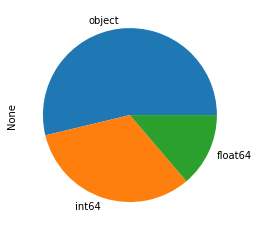

In [254]:

all_data.dtypes.value_counts().plot.pie()

### missing value

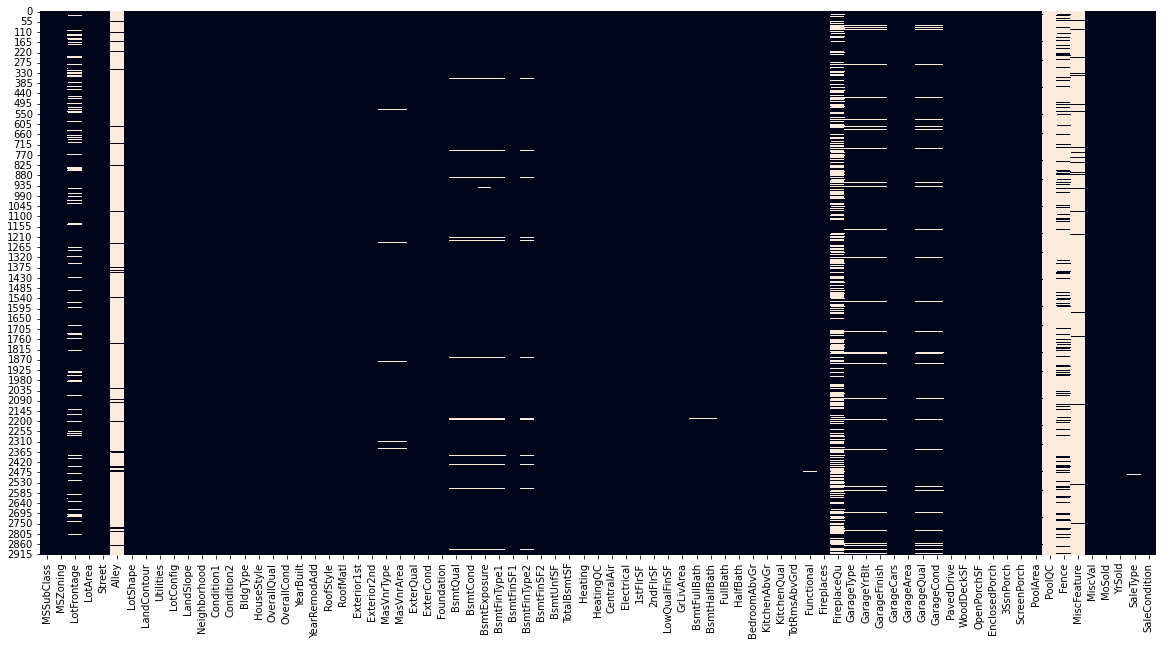

In [323]:
# drop id column 
all_data.drop(['Id'], axis = 1, inplace = True) 
df = all_data.copy()
df.dtypes.value_counts()
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [324]:

def missing_percentage(df):
  total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
  percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
  data_type = df.dtypes.sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
  return pd.concat([total, percent, data_type], axis=1, keys=['Total','Percent','Type'])


In [257]:
missing_percentage(df)

Total  Percent     Type
PoolQC         2909    99.66   object
MiscFeature    2814    96.40   object
Alley          2721    93.22   object
Fence          2348    80.44   object
FireplaceQu    1420    48.65   object
LotFrontage     486    16.65  float64
GarageYrBlt     159     5.45  float64
GarageFinish    159     5.45   object
GarageQual      159     5.45   object
GarageCond      159     5.45   object
GarageType      157     5.38   object
BsmtExposure     82     2.81   object
BsmtCond         82     2.81   object
BsmtQual         81     2.77   object
BsmtFinType2     80     2.74   object
BsmtFinType1     79     2.71   object
MasVnrType       24     0.82   object
MasVnrArea       23     0.79  float64
MSZoning          4     0.14   object
Functional        2     0.07   object
BsmtHalfBath      2     0.07  float64
BsmtFullBath      2     0.07  float64
Utilities         2     0.07   object
SaleType          1     0.03   object
BsmtFinSF1        1     0.03  float64
KitchenQual       1     0.03   object
GarageCars        1     0.03  float64
BsmtUnfSF         1     0.03  float64
TotalBsmtSF       1     0.03  float64
Exterior2nd       1     0.03   object
Exterior1st       1     0.03   object
GarageArea        1     0.03  float64
Electrical        1     0.03   object
BsmtFinSF2        1     0.03  float64

In [325]:
#drop column data have missing values is greater than  70% 
for column in df.columns:
  percent =round(df[column].isnull().sum()/len(df)*100,1) 
  if  percent > 70:
    df.drop([column], axis = 1, inplace = True) 
list1 = ["FireplaceQu","GarageFinish","GarageQual","GarageCond","GarageYrBlt","BsmtCond","BsmtExposure","BsmtQual"]    
for column in list1:
  df.drop([column], axis = 1, inplace = True) 

 

In [259]:
missing_percentage(df) 

Total  Percent     Type
LotFrontage     486    16.65  float64
GarageType      157     5.38   object
BsmtFinType2     80     2.74   object
BsmtFinType1     79     2.71   object
MasVnrType       24     0.82   object
MasVnrArea       23     0.79  float64
MSZoning          4     0.14   object
BsmtFullBath      2     0.07  float64
BsmtHalfBath      2     0.07  float64
Utilities         2     0.07   object
Functional        2     0.07   object
GarageArea        1     0.03  float64
Exterior2nd       1     0.03   object
Exterior1st       1     0.03   object
GarageCars        1     0.03  float64
TotalBsmtSF       1     0.03  float64
BsmtFinSF1        1     0.03  float64
BsmtFinSF2        1     0.03  float64
BsmtUnfSF         1     0.03  float64
Electrical        1     0.03   object
SaleType          1     0.03   object
KitchenQual       1     0.03   object

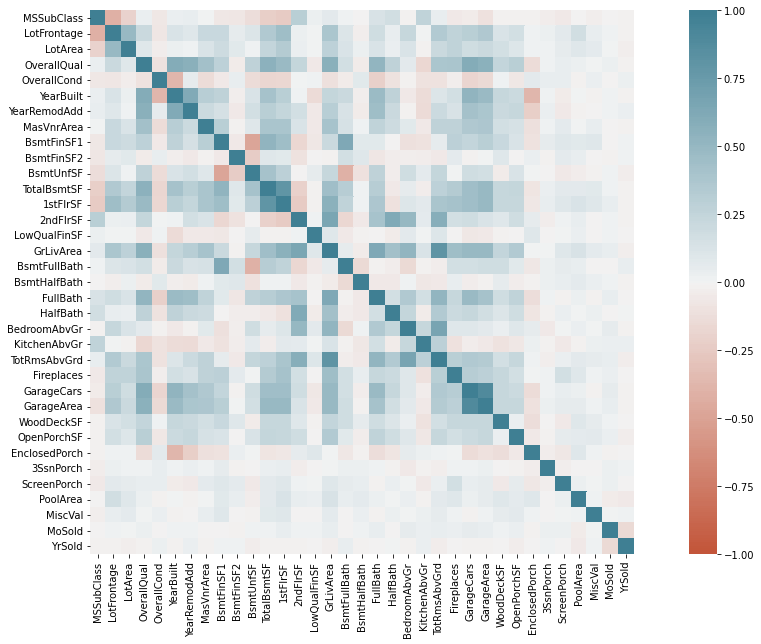

In [260]:
#calcul the correlation betwen the features
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True)

In [326]:
#select the column with hight correclation
def  height_corr(df,threshold):
      cor_matrix = df.corr().abs()
      upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
      to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold )]
      return to_drop
corrFutures = height_corr(df, threshold=0.7) 
print("the column height correleted ")     
corrFutures

the column height correleted 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea']

In [288]:
#affiche the corr off this element with other in ur dataset 
list_corr_two=[]
cor_matrix = df.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
for column in  corrFutures:
       print("******************************{}**************************".format(column))
       print(upper_tri[column])

******************************1stFlrSF**************************
MSSubClass       0.248641
LotFrontage      0.458247
LotArea          0.332460
OverallQual      0.479152
OverallCond      0.157418
YearBuilt        0.310814
YearRemodAdd     0.242245
MasVnrArea       0.395834
BsmtFinSF1       0.458092
BsmtFinSF2       0.084330
BsmtUnfSF        0.296600
TotalBsmtSF      0.801670
1stFlrSF              NaN
2ndFlrSF              NaN
LowQualFinSF          NaN
GrLivArea             NaN
BsmtFullBath          NaN
BsmtHalfBath          NaN
FullBath              NaN
HalfBath              NaN
BedroomAbvGr          NaN
KitchenAbvGr          NaN
TotRmsAbvGrd          NaN
Fireplaces            NaN
GarageCars            NaN
GarageArea            NaN
WoodDeckSF            NaN
OpenPorchSF           NaN
EnclosedPorch         NaN
3SsnPorch             NaN
ScreenPorch           NaN
PoolArea              NaN
MiscVal               NaN
MoSold                NaN
YrSold                NaN
Name: 1stFlrSF, dtype: fl

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


In [327]:
df = df.drop(columns=corrFutures)    

### Examen de la colonne target

In [328]:
def plotting_3_chart(df, feature):
    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


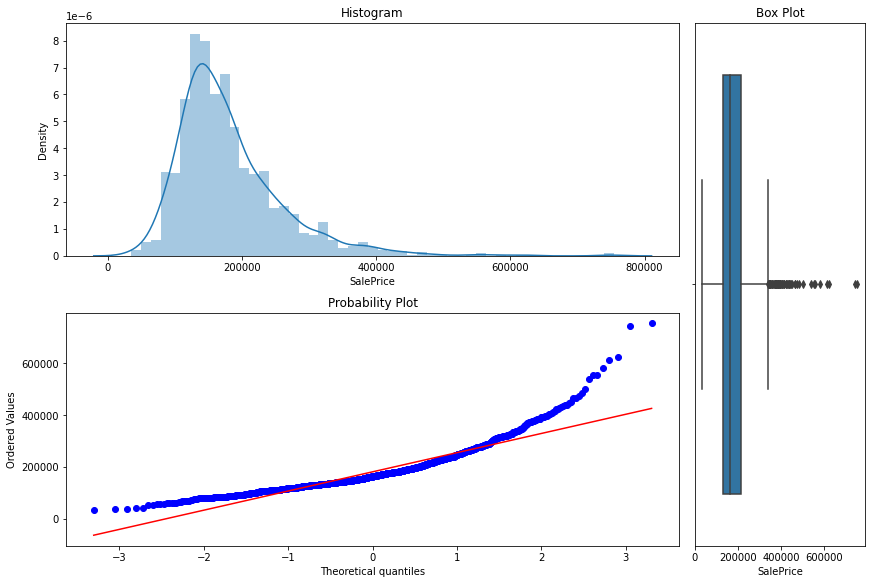

In [329]:
plotting_3_chart(train, 'SalePrice') 

In [330]:
 ## we need a normal distribution for sale price 
train["SalePrice"] = np.log1p(train["SalePrice"])


## histogrames des variables continues

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

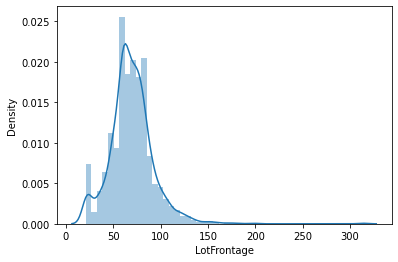

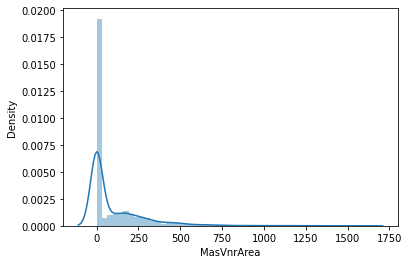

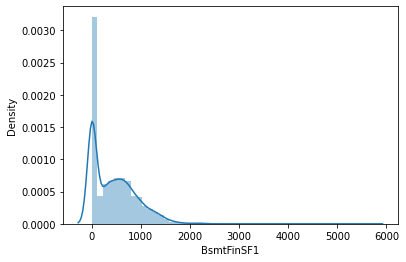

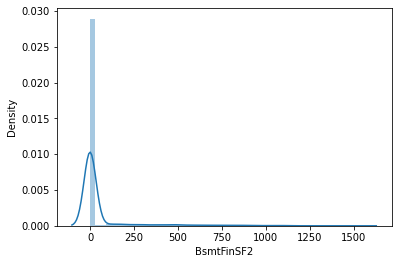

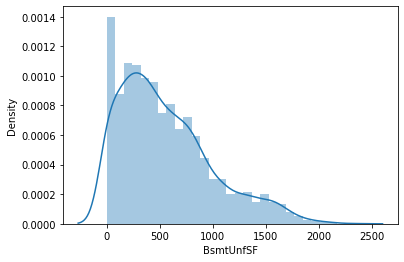

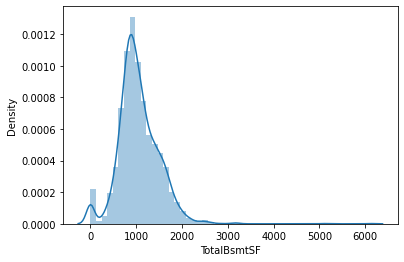

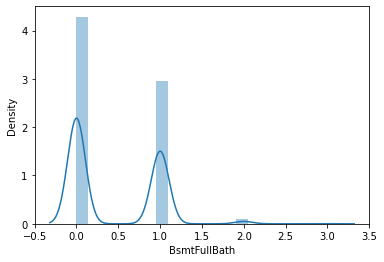

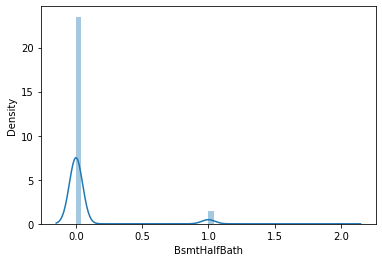

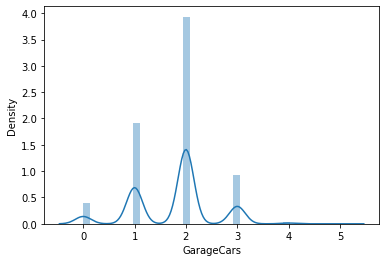

In [291]:

for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col] )
   

### Variables Qualitatives

In [331]:

for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')

MSZoning------------------------------------------ ['RL' 'RM' 'C (all)' 'FV' 'RH' nan]
Street-------------------------------------------- ['Pave' 'Grvl']
LotShape------------------------------------------ ['Reg' 'IR1' 'IR2' 'IR3']
LandContour--------------------------------------- ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities----------------------------------------- ['AllPub' 'NoSeWa' nan]
LotConfig----------------------------------------- ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope----------------------------------------- ['Gtl' 'Mod' 'Sev']
Neighborhood-------------------------------------- ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1---------------------------------------- ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2---------------------------


###  Visulation initiale - Elimination des colonnes inutiles

In [332]:
df["condition"] = df["Condition1"]+df["Condition2"]
# df["Exterior"] =  df ["Exterior1st"]+df["Exterior2nd"]
# df["BsmtFinType"]= df["BsmtFinType1"]+df["BsmtFinType2"]
all_data.drop(['Condition1'], axis = 1, inplace = True)
all_data.drop(['Condition2'], axis = 1, inplace = True)
#all_data.drop(['YearRemodAdd'], axis = 1, inplace = True)

df["condition"].value_counts()



NormNorm        2511
FeedrNorm        155
ArteryNorm        89
RRAnNorm          41
PosNNorm          35
RRAeNorm          28
PosANorm          17
RRAnFeedr          8
RRNnNorm           7
RRNeNorm           6
PosNPosN           4
FeedrFeedr         4
PosAPosA           3
ArteryArtery       2
FeedrRRNn          2
RRNnFeedr          1
ArteryPosA         1
FeedrRRAn          1
FeedrRRAe          1
RRAnArtery         1
FeedrArtery        1
RRNnArtery         1
Name: condition, dtype: int64

In [135]:
len(df.columns)


65

### Relation Variables / Variables

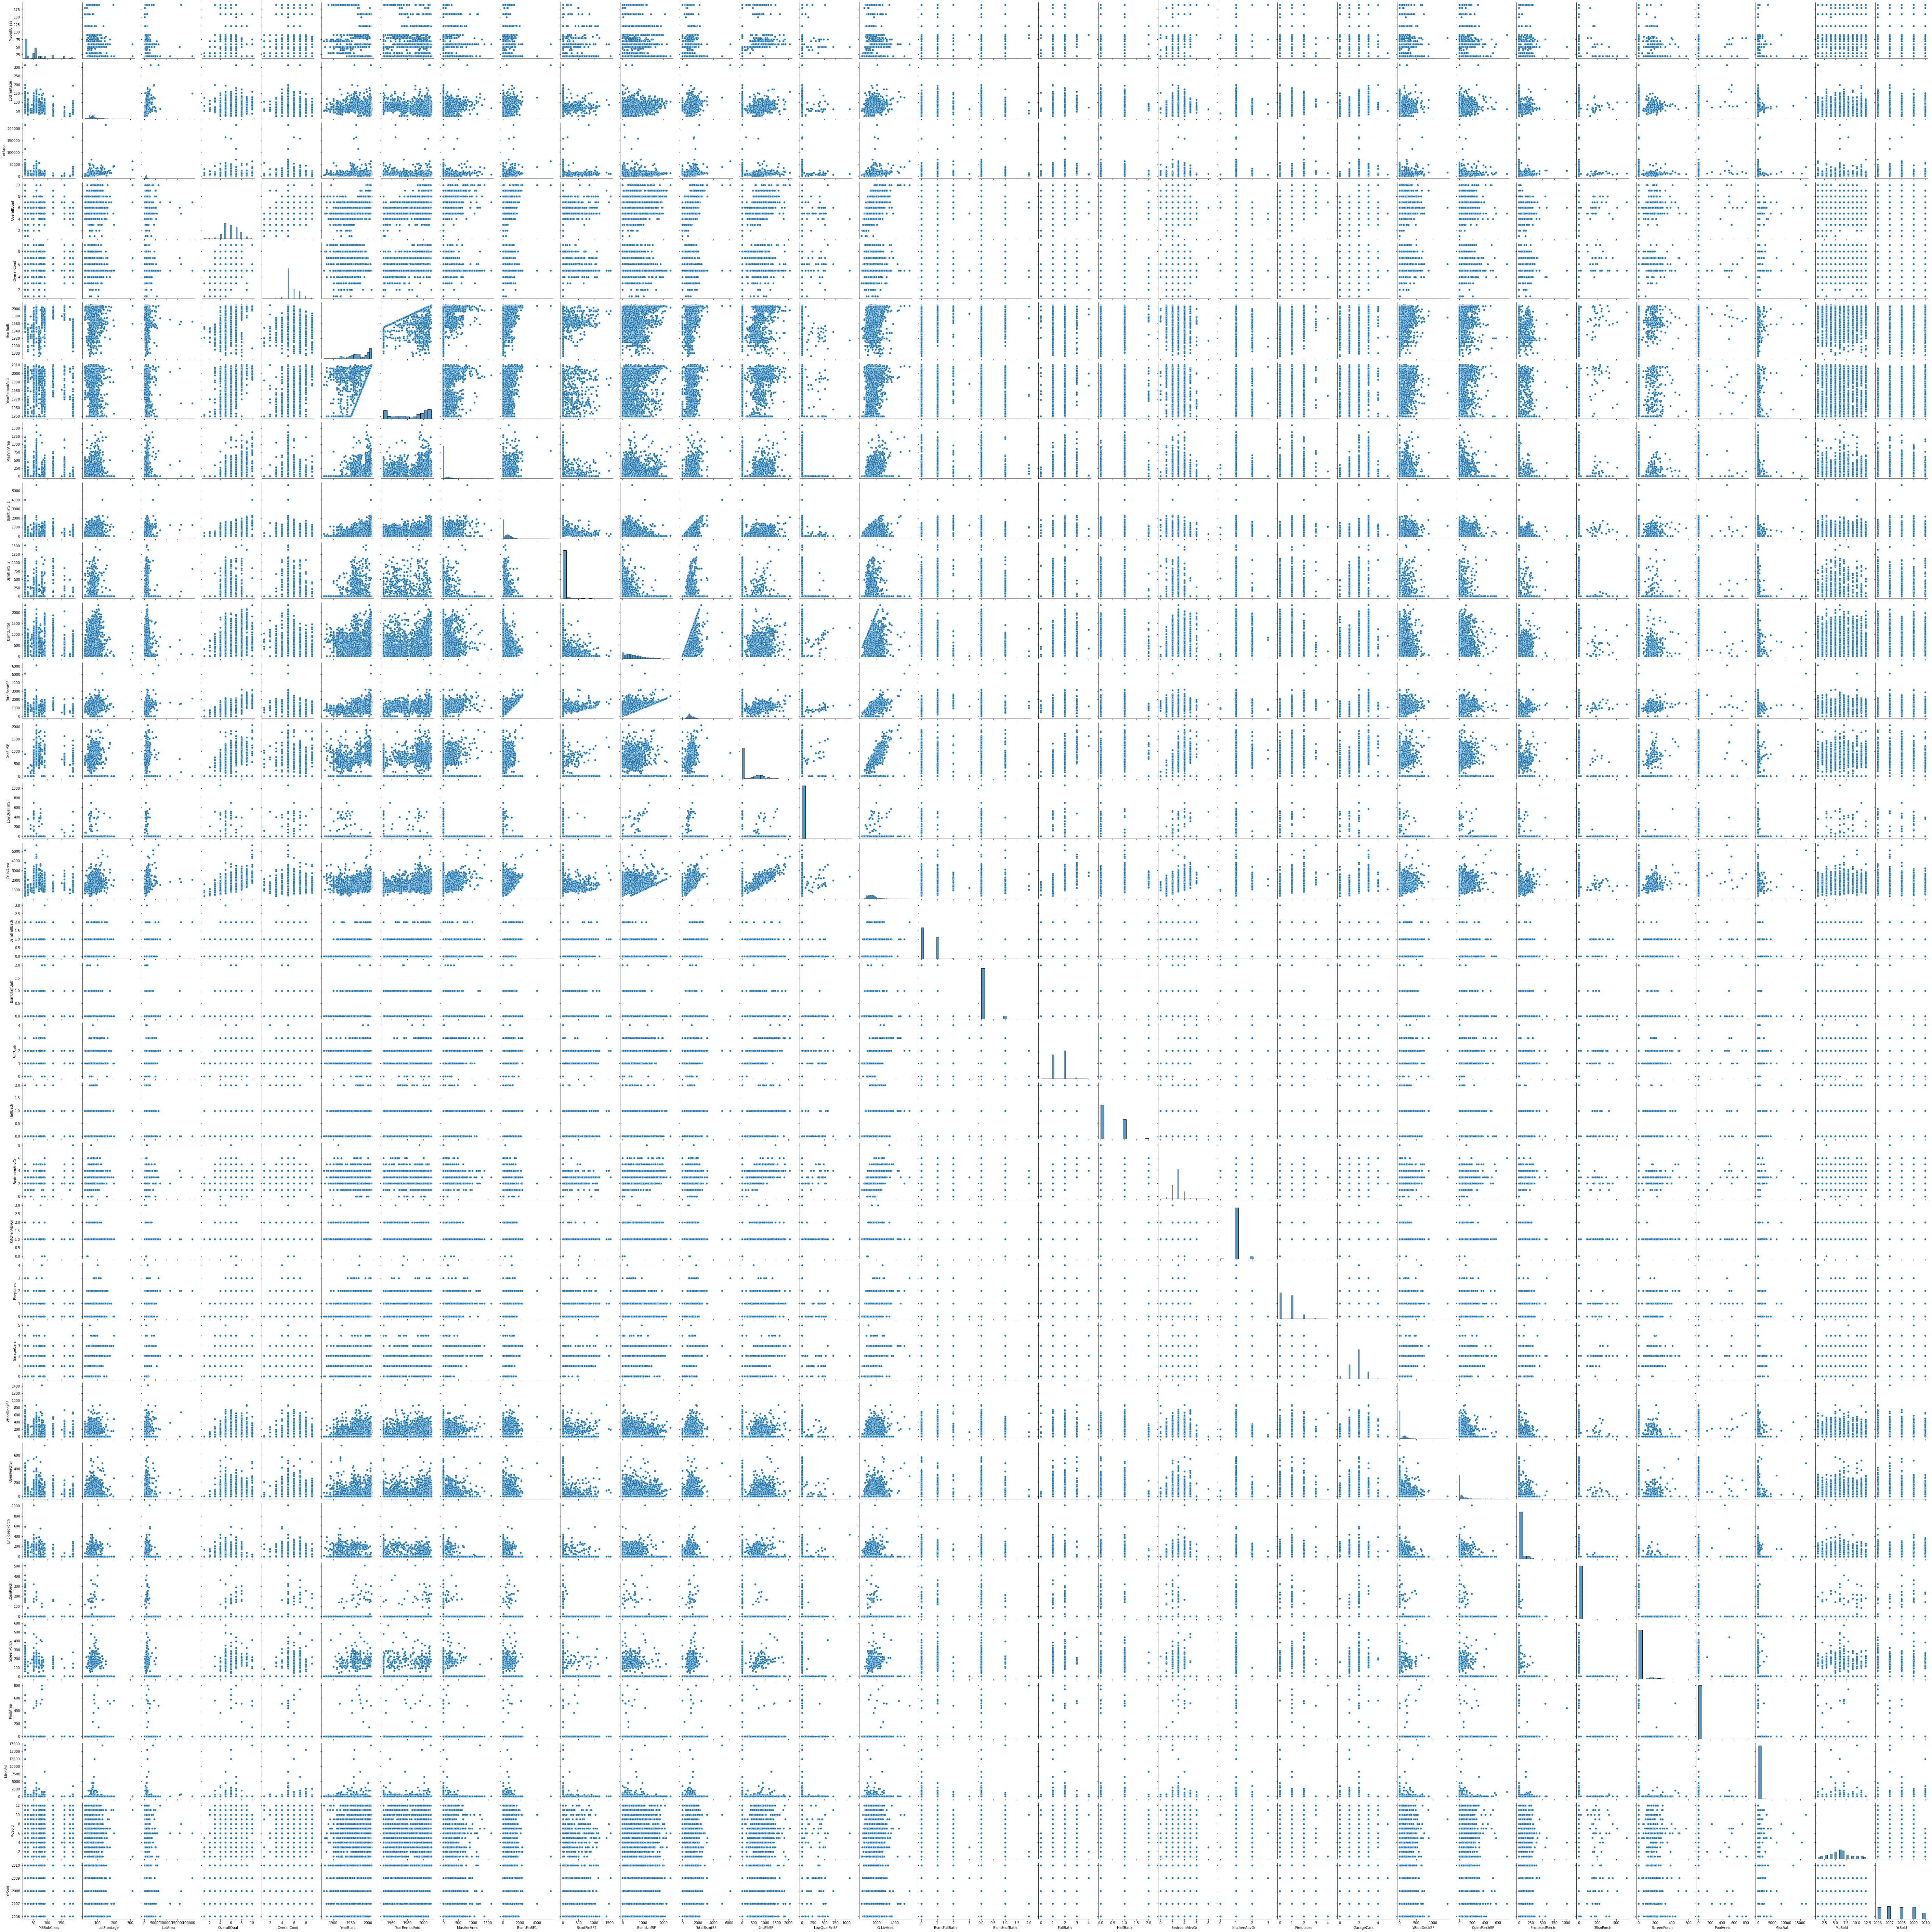

In [ ]:
sns.pairplot(df)

###  Data prep

In [136]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside       Gtl  ...             0         0           0   
1    AllPub       FR2       Gtl  ...             0         0           0   
2    AllPub    Inside       Gtl  ...             0         0           0   
3    AllPub    Corner       Gtl  ...           272         0           0   
4    AllPub       FR2       Gtl  ...             0         0           0   

  PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition  condition  
0        0       0       2    2008        WD         Normal   NormNorm  
1        0       0       5    2007        WD         Normal  FeedrNorm  
2        0       0       9    2008        WD         Normal   NormNorm  
3        0       0       2    2006        WD        Abnorml   NormNorm  
4        0       0      12    2008        WD         Normal   NormNorm  

[5 rows x 65 columns]

4.3 Data cleaning


In [333]:
#Some features consist of numbers that are actually categories so we'll convert to str so they get binarized later

all_data['OverallCond'] = all_data['OverallCond'].astype(str) 
all_data['OverallQual'] = all_data['OverallQual'].astype(str) 
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str) 
all_data['YearBuilt'] = all_data['YearBuilt'].astype(str) 
all_data['YearRemodAdd'] = all_data['YearRemodAdd'].astype(str) 
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].astype(str) 
all_data['YrSold'] = all_data['YrSold'].astype(str) 
all_data['MoSold'] = all_data['MoSold'].astype(str)
all_data['MasVnrType'] = all_data['MasVnrType'].astype(str)

In [295]:
missing_percentage(all_data)

Total  Percent     Type
PoolQC         2909    99.66   object
MiscFeature    2814    96.40   object
Alley          2721    93.22   object
Fence          2348    80.44   object
FireplaceQu    1420    48.65   object
LotFrontage     486    16.65  float64
GarageQual      159     5.45   object
GarageFinish    159     5.45   object
GarageCond      159     5.45   object
GarageType      157     5.38   object
BsmtExposure     82     2.81   object
BsmtCond         82     2.81   object
BsmtQual         81     2.77   object
BsmtFinType2     80     2.74   object
BsmtFinType1     79     2.71   object
MasVnrArea       23     0.79  float64
MSZoning          4     0.14   object
Functional        2     0.07   object
Utilities         2     0.07   object
BsmtFullBath      2     0.07  float64
BsmtHalfBath      2     0.07  float64
GarageCars        1     0.03  float64
BsmtFinSF2        1     0.03  float64
BsmtFinSF1        1     0.03  float64
GarageArea        1     0.03  float64
Exterior2nd       1     0.03   object
Exterior1st       1     0.03   object
TotalBsmtSF       1     0.03  float64
Electrical        1     0.03   object
KitchenQual       1     0.03   object
SaleType          1     0.03   object
BsmtUnfSF         1     0.03  float64

## remove deplicate values 

In [334]:
#
# occurrence based on all columns

duplicate = df[df.duplicated()]
print("Duplicate Rows :")
# Print the resultant Dataframe
duplicate
df.drop_duplicates(keep='first')

Duplicate Rows :


MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL         65.0     8450   Pave      Reg         Lvl   
1             20       RL         80.0     9600   Pave      Reg         Lvl   
2             60       RL         68.0    11250   Pave      IR1         Lvl   
3             70       RL         60.0     9550   Pave      IR1         Lvl   
4             60       RL         84.0    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
2914         160       RM         21.0     1936   Pave      Reg         Lvl   
2915         160       RM         21.0     1894   Pave      Reg         Lvl   
2916          20       RL        160.0    20000   Pave      Reg         Lvl   
2917          85       RL         62.0    10441   Pave      Reg         Lvl   
2918          60       RL         74.0     9627   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
0       AllPub    Inside       Gtl      CollgCr       Norm       Norm   
1       AllPub       FR2       Gtl      Veenker      Feedr       Norm   
2       AllPub    Inside       Gtl      CollgCr       Norm       Norm   
3       AllPub    Corner       Gtl      Crawfor       Norm       Norm   
4       AllPub       FR2       Gtl      NoRidge       Norm       Norm   
...        ...       ...       ...          ...        ...        ...   
2914    AllPub    Inside       Gtl      MeadowV       Norm       Norm   
2915    AllPub    Inside       Gtl      MeadowV       Norm       Norm   
2916    AllPub    Inside       Gtl      Mitchel       Norm       Norm   
2917    AllPub    Inside       Gtl      Mitchel       Norm       Norm   
2918    AllPub    Inside       Mod      Mitchel       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0        1Fam     2Story            7            5       2003          2003   
1        1Fam     1Story            6            8       1976          1976   
2        1Fam     2Story            7            5       2001          2002   
3        1Fam     2Story            7            5       1915          1970   
4        1Fam     2Story            8            5       2000          2000   
...       ...        ...          ...          ...        ...           ...   
2914    Twnhs     2Story            4            7       1970          1970   
2915   TwnhsE     2Story            4            5       1970          1970   
2916     1Fam     1Story            5            7       1960          1996   
2917     1Fam     SFoyer            5            5       1992          1992   
2918     1Fam     2Story            7            5       1993          1994   

     RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
0        Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0   
1        Gable  CompShg     MetalSd     MetalSd       None         0.0   
2        Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0   
3        Gable  CompShg     Wd Sdng     Wd Shng       None         0.0   
4        Gable  CompShg     VinylSd     VinylSd    BrkFace       350.0   
...        ...      ...         ...         ...        ...         ...   
2914     Gable  CompShg     CemntBd     CmentBd       None         0.0   
2915     Gable  CompShg     CemntBd     CmentBd       None         0.0   
2916     Gable  CompShg     VinylSd     VinylSd       None         0.0   
2917     Gable  CompShg     HdBoard     Wd Shng       None         0.0   
2918     Gable  CompShg     HdBoard     HdBoard    BrkFace        94.0   

     ExterQual ExterCond Foundation BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
0           Gd        TA      PConc          GLQ       706.0          Unf   
1           TA        TA     CBlock          ALQ       978.0          Unf   
2           Gd        TA      PConc          GLQ       486.0          Unf   
3           TA        TA     BrkTi

In [335]:
# replace Missing value 
missing_fetures=[]
for column in df.columns:
  if df[column].isnull().sum() > 0:
    missing_fetures.append(column)
if "MasVnrType" in missing_fetures:
   missing_fetures.remove("MasVnrType")    
for feature in missing_fetures :
  if  df[feature].mode()[0] == "None":
     df[feature] = df[feature].fillna(0)
       
  else :
    df[feature] = all_data[feature].fillna(df[feature].mode()[0])  
     
missing_percentage(df)


Total  Percent    Type
MasVnrType     24     0.82  object

In [ ]:
# all_data['Functional'] = all_data['Functional'].fillna('Typical') #Functional: Home functionality (Assume typical unless deductions are warranted) 
# all_data['LotFrontage'] = all_data['LotFrontage'].fillna(0) #if data ismissing, there is none ... I guess 
# all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(0) 

# all_data['BsmtFullBath'] = all_data['BsmtFullBath'].fillna(0)
# all_data['BsmtHalfBath'] = all_data['BsmtHalfBath'].fillna(0) 
# all_data['BsmtFinSF1'] = all_data['BsmtFinSF2'].fillna(0) 
# all_data['BsmtFinSF2'] = all_data['BsmtFinSF2'].fillna(0) 
# all_data['BsmtUnfSF'] = all_data['BsmtUnfSF'].fillna(0) 
# all_data['TotalBsmtSF'] = all_data['TotalBsmtSF'].fillna(0) 
# all_data['GarageCars'] = all_data['GarageCars'].fillna(0) 
# all_data['GarageYrBlt'] = all_data['GarageYrBlt'].fillna(0)
# all_data['SaleType'] = all_data['SaleType'].fillna("Oth")
# all_data['Electrical'] = all_data['Electrical'].fillna('SBrkr') #default values 
# all_data['Utilities'] = all_data['Utilities'].fillna('AllPub') #default values 
# all_data['GarageArea'] = all_data['GarageArea'].fillna(0) 
# all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0]) #filling with mode
# all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0]) 
# all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])


In [336]:
## change  categorical columns into numeric categorie

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for col in df.select_dtypes('object'):
   list1 =  encoder.fit_transform(df[col])
   list2 =  [i for j, i in enumerate(list1) if i not in list1[:j]]
   list3 =  encoder.inverse_transform(list2)
   df[col] =  encoder.transform(df[col])
   print(col,list2,  list3)
    

#encoder.inverse_transform(np.array([0, 0, 2]))

MSZoning [3, 4, 0, 1, 2] ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street [1, 0] ['Pave' 'Grvl']
LotShape [3, 0, 1, 2] ['Reg' 'IR1' 'IR2' 'IR3']
LandContour [3, 0, 2, 1] ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities [0, 1] ['AllPub' 'NoSeWa']
LotConfig [4, 2, 0, 1, 3] ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope [0, 1, 2] ['Gtl' 'Mod' 'Sev']
Neighborhood [5, 24, 6, 15, 11, 21, 14, 17, 3, 19, 16, 12, 20, 9, 10, 7, 23, 8, 22, 4, 13, 0, 2, 18, 1] ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 [2, 1, 4, 0, 5, 8, 6, 3, 7] ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 [2, 0, 7, 1, 4, 3, 6, 5] ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType [0, 1, 2, 4, 3] ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle [5, 2, 0, 1, 6, 7, 4, 3] ['2Story' 

In [337]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')

In [338]:
df.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0          60         3         65.0     8450       1         3            3   
1          20         3         80.0     9600       1         3            3   
2          60         3         68.0    11250       1         0            3   
3          70         3         60.0     9550       1         0            3   
4          60         3         84.0    14260       1         0            3   

   Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0          0          4          0             5           2           2   
1          0          2          0            24           1           2   
2          0          4          0             5           2           2   
3          0          0          0             6           2           2   
4          0          2          0            15           2           2   

   BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         0           5            7            5       2003          2003   
1         0           2            6            8       1976          1976   
2         0           5            7            5       2001          2002   
3         0           5            7            5       1915          1970   
4         0           5            8            5       2000          2000   

   RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
0          1         1           12           13           1       196.0   
1          1         1            8            8           2         0.0   
2          1         1           12           13           1       162.0   
3          1         1           13           15           2         0.0   
4          1         1           12           13           1       350.0   

   ExterQual  ExterCond  Foundation  BsmtFinType1  BsmtFinSF1  BsmtFinType2  \
0          2          4           2             2       706.0             5   
1          3          4           1             0       978.0             5   
2          2          4           2             2       486.0             5   
3          3          4           0             0       216.0             5   
4          2          4           2             2       655.0             5   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  \
0         0.0      150.0        856.0        1          0           1   
1         0.0      284.0       1262.0        1          0           1   
2         0.0      434.0        920.0        1          0           1   
3         0.0      540.0        756.0        1          2           1   
4         0.0      490.0       1145.0        1          0           1   

   Electrical  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0           4       854             0       1710           1.0           0.0   
1           4         0             0       1262           0.0           1.0   
2           4       866             0       1786           1.0           0.0   
3           4       756             0       1717           1.0           0.0   
4           4      1053             0       2198           1.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  Functional  \
0         2         1             3             1            2           6   
1         2         0             3             1            3           6   
2         2         1             3             1            2           6   
3         1         0             3             1            2           6   
4         2         1             4             1            2           6   

   Fireplaces  GarageType  GarageCars  PavedDrive  WoodDeckSF  OpenPorchSF  \
0           0           1         2.0           2           0           61   
1           1           1         2.0           2         298            0   
2           1           1         2.0    

In [362]:
# split the data 
X = df[:1460]
X_test = df[1460:]
y = pd.DataFrame(data =train["SalePrice"]) 




### PCA

Text(0, 0.5, 'cumulative explained variance')

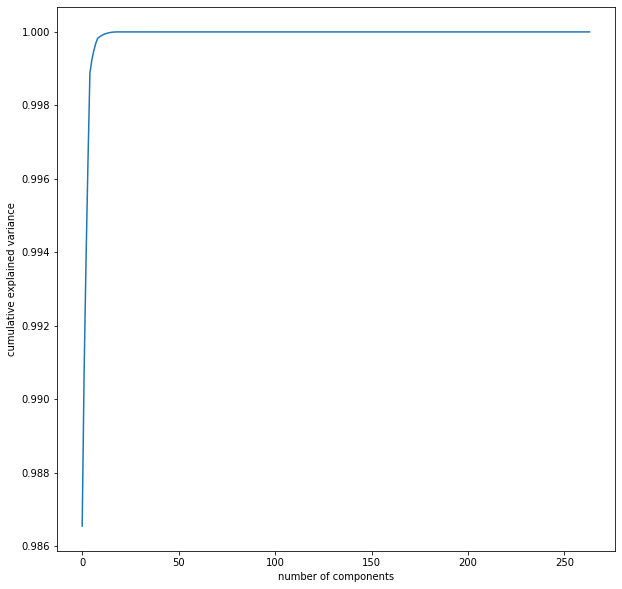

In [340]:
#(PCA) simplifies the complexity in high-dimensional data while retaining trends and patterns.
#It does this by transforming the data into fewer dimensions, which act as summaries of features
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
sc = StandardScaler() #this is a requirement for pca 

Z = sc.fit_transform(X)
pca = PCA(n_components = 250)
pca = PCA().fit(X)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

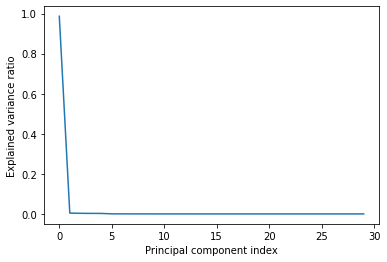

In [341]:
pca = PCA(n_components=30)
pca.fit(X)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

In [70]:
# transform the test data also 
X = pca.transform(X)
X_test = pca.transform(X_test)

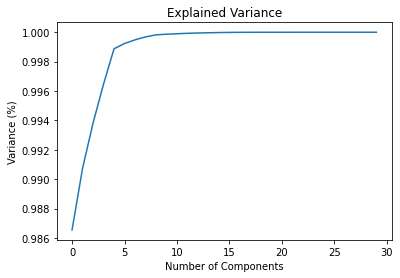

In [146]:
plt.figure() 
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components') 
plt.ylabel('Variance (%)') 
plt.title('Explained Variance') 
plt.show()

In [74]:
# Var_matrix =(pd.concat([pd.DataFrame(list(final_features.columns), columns=["Factors"] ) ,pd.DataFrame(list(pca.explained_variance_**2), columns=["^2 Variance"] )] , axis=1).sort_values(by='^2 Variance', ascending = False)[0:pca_com])

# list(Var_matrix['Factors'])
# X_new = final_features[list(Var_matrix['Factors'])]
# X_new.dtypes 
# X_new
# X_train = X_new[:1460] #respliting data X_test = X_new[1460:] #respliting data

## Split the data 

In [363]:
# create training and testing vars
X_train_T, X_test_T, y_train_T, y_test_T = train_test_split(X, y, test_size=0.4)

In [364]:
X_train_T.shape

(876, 65)

### Create Model

In [343]:
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors  import KNeighborsRegressor


In [366]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
model = BaggingRegressor(base_estimator=RandomForestRegressor(),
                         n_estimators=100)

model.fit(X_train_T, y_train_T)
model.score(X_test_T, y_test_T)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


0.8719983337626809

Mean Absolute Error: 0.09675257337983037


0.8323247747629866

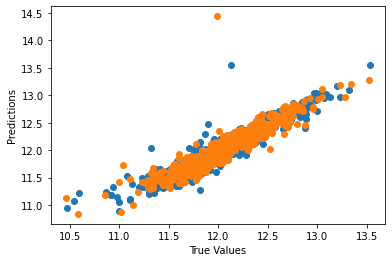

In [367]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn import svm 

model1 = LinearRegression()
model1 = model1.fit(X_train_T, y_train_T)
predictions_T = model1.predict(X_train_T)
y_hat_test1 = model1.predict(X_test_T)
plt.scatter(y_train_T, predictions_T)
plt.xlabel('True Values') 
plt.ylabel('Predictions')
plt.scatter(y_test_T, y_hat_test1) 
plt.xlabel('True Values') 
plt.ylabel('Predictions')
 #predicting the values y_pred

print('Mean Absolute Error:', mean_absolute_error(y_test_T, y_hat_test1))
model1.score(X_test_T, y_test_T)

### Save  the model 

In [368]:
import joblib
joblib.dump(model, 'model.joblib') 

['model.joblib']

In [369]:
model = joblib.load('model.joblib')


In [388]:
X_train_T.head(1)

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
275          50         3         55.0     7264       1         3   

     LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
275            3          0          4          0             3           2   

     Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
275           2         0           0            7            7       1925   

     YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
275          2007          1         1           13           14           2   

     MasVnrArea  ExterQual  ExterCond  Foundation  BsmtFinType1  BsmtFinSF1  \
275         0.0          2          2           0             5         0.0   

     BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  \
275             5         0.0      952.0        952.0        2          2   

     CentralAir  Electrical  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
275           0           4       596             0       1548           0.0   

     BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
275           0.0         2         1             3             1   

     KitchenQual  Functional  Fireplaces  GarageType  GarageCars  PavedDrive  \
275            0           6           0           5         2.0           2   

     WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
275          74            0              0          0          144         0   

     MiscVal  MoSold  YrSold  SaleType  SaleCondition  condition  
275        0      10    2009         8              4          9

In [371]:
# MSZoning [3, 4, 0, 1, 2] ['RL' 'RM' 'C (all)' 'FV' 'RH']
# Street [1, 0] ['Pave' 'Grvl']
# LotShape [3, 0, 1, 2] ['Reg' 'IR1' 'IR2' 'IR3']
# LandContour [3, 0, 2, 1] ['Lvl' 'Bnk' 'Low' 'HLS']
# Utilities [0, 1] ['AllPub' 'NoSeWa']
# LotConfig [4, 2, 0, 1, 3] ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
# LandSlope [0, 1, 2] ['Gtl' 'Mod' 'Sev']
# Neighborhood [5, 24, 6, 15, 11, 21, 14, 17, 3, 19, 16, 12, 20, 9, 10, 7, 23, 8, 22, 4, 13, 0, 2, 18, 1] ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
#  'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
#  'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
#  'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
# Condition1 [2, 1, 4, 0, 5, 8, 6, 3, 7] ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
# Condition2 [2, 0, 7, 1, 4, 3, 6, 5] ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
# BldgType [0, 1, 2, 4, 3] ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
# HouseStyle [5, 2, 0, 1, 6, 7, 4, 3] ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
# RoofStyle [1, 3, 2, 4, 0, 5] ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
# RoofMatl [1, 7, 3, 6, 2, 5, 4, 0] ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
#  'ClyTile']
# Exterior1st [12, 8, 13, 6, 3, 14, 5, 9, 0, 11, 2, 1, 10, 7, 4] ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
#  'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
#  'CBlock']
# Exterior2nd [13, 8, 15, 6, 10, 14, 5, 3, 12, 0, 2, 7, 1, 11, 9, 4] ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
#  'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
#  'Other' 'CBlock']
# MasVnrType [1, 2, 3, 0, 4] ['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
# ExterQual [2, 3, 0, 1] ['Gd' 'TA' 'Ex' 'Fa']
# ExterCond [4, 2, 1, 3, 0] ['TA' 'Gd' 'Fa' 'Po' 'Ex']
# Foundation [2, 1, 0, 5, 3, 4] ['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']
# BsmtFinType1 [2, 0, 5, 4, 1, 3] ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'LwQ']
# BsmtFinType2 [5, 1, 0, 4, 3, 2] ['Unf' 'BLQ' 'ALQ' 'Rec' 'LwQ' 'GLQ']
# Heating [1, 2, 3, 5, 4, 0] ['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']
# HeatingQC [0, 2, 4, 1, 3] ['Ex' 'Gd' 'TA' 'Fa' 'Po']
# CentralAir [1, 0] ['Y' 'N']
# Electrical [4, 1, 0, 2, 3] ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix'] 	
# KitchenQual [2, 3, 0, 1] ['Gd' 'TA' 'Ex' 'Fa']
# Functional [6, 2, 0, 3, 4, 1, 5] ['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']
# GarageType [1, 5, 3, 4, 2, 0] ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' 'Basment' '2Types']
# PavedDrive [2, 0, 1] ['Y' 'N' 'P']
# SaleType [8, 6, 0, 3, 4, 1, 5, 2, 7] ['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth']
# SaleCondition [4, 0, 5, 1, 2, 3] ['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']
# condition [9, 5, 12, 1, 0, 14, 8, 21, 16, 10, 4, 17, 18, 13, 20, 2, 7, 6, 11, 15, 3, 19] ['NormNorm' 'FeedrNorm' 'PosNNorm' 'ArteryNorm' 'ArteryArtery' 'RRAeNorm'
#  'FeedrRRNn' 'RRNnNorm' 'RRAnFeedr' 'PosANorm' 'FeedrFeedr' 'RRAnNorm'
#  'RRNeNorm' 'PosNPosN' 'RRNnFeedr' 'ArteryPosA' 'FeedrRRAn' 'FeedrRRAe'
#  'PosAPosA' 'RRAnArtery' 'FeedrArtery' 'RRNnArtery']

62

In [389]:

LotFrontage = 21.0
LotArea = 1596.0 #Lot size in square feet
YearBuilt = 1973
GarageCars= 0   #ize of garage in car capacity
MSZoning = 0
Bedroom = 3
Kitchen = 2
PoolArea=200 #Pool area in square feet
SaleType =  8 
YrSold = 2009
_2ndFlrSF = 0 

In [391]:
house = [190,MSZoning,LotFrontage,LotArea,1,3,3,0,4,0,3,2,2,0,0,7,7,YearBuilt,YearBuilt,1,1,13,14,2,0.0,2,2,0,5,0.0,5,
0.0,0.0,_2ndFlrSF,2,2,0,4,596,0,LotArea,0.0,0.0,2,1,Bedroom,Kitchen,0,6,0,5,GarageCars,1,0,0,0,0,90,100,0,
10,YrSold,SaleType,4,9]

In [392]:
y= model.predict([house])


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but BaggingRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [393]:
y
back = np.expm1(y)
print("a house with this feature it will be {}$".format(back[0]))

a house with this feature it will be 157476.8467968563$
